The purpose of this notebook is to do some basic preprocessing in the time domain and plot the result

In [2]:
import os
import pickle
import numpy as np
import math
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.signal.windows import tukey
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

In [3]:
# Loading ex-vivo data
path_to_data = "Data\\Ex-Vivo\\"
files = os.listdir(path_to_data)

# Removing readme
files.remove("READ_ME.txt")

data = []

for file in files:
    with open(path_to_data + file, 'rb') as f:
        data.append(pickle.load(f))

# sorting data based on date

for d in data:
    timestamp = d['time']
    d['date'] = datetime.fromisoformat(timestamp)

data = sorted(data, key=lambda x: x['date'])


# Fixing labeling errors

data[51]['samplematrix'] = 'sample 7 PBS'
data[51]['conc'] = 0.0

data[52]['samplematrix'] = 'sample 8 g/PBS'
data[52]['conc'] = 2.5

data[53]['samplematrix'] = 'sample 6 g/PBS'
data[53]['conc'] = 2.5


# Fixing issue with sample ids due to multiple days

for d in data:
    d['samplematrix_fixed'] = d['samplematrix']

for d in data[37:]:
    values = d['samplematrix'].split()
    if len(values) > 1:
        id = int(values[1])
        new_id = id+18
        new_samplematrix = values[0] + " " + str(new_id) + " " + values[2]
        d['samplematrix_fixed'] = new_samplematrix


# Removing air and NC as these are irrelevant for our purpose
data = [d for d in data if not d['samplematrix_fixed'] == 'air']

ids_to_remove = []

for d in data:
    values = d['samplematrix_fixed'].split()
    if values[2] == 'NC':
        ids_to_remove.append(values[1])

data = [d for d in data if not d['samplematrix_fixed'].split()[1] in ids_to_remove]

# Creating sample ID as separate field in data dict
for d in data:
    d['sample_id'] = d['samplematrix_fixed'].split()[1]

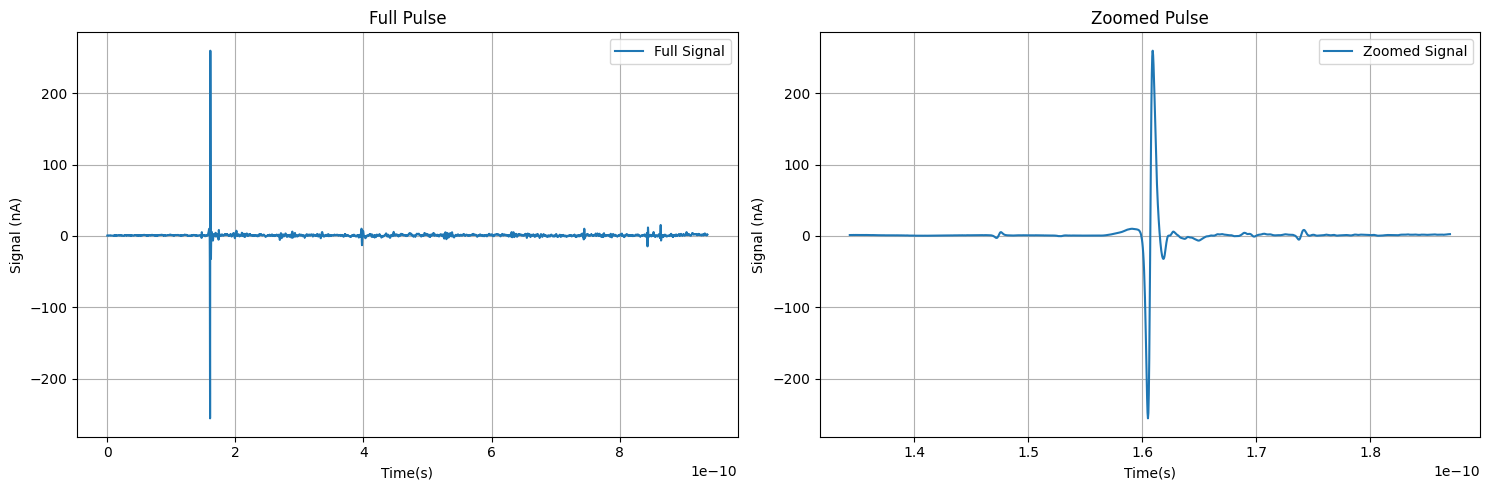

In [9]:
x = data[4]['scan'][0]['forward_scan']['time']
y = data[4]['scan'][0]['forward_scan']['signal']

min_index = np.argmin(y)
max_index = np.argmax(y)
middle_index = math.floor((min_index + max_index) / 2)
zoom_start = middle_index - 700
zoom_end = middle_index + 700

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(x, y, label='Full Signal')
plt.xlabel("Time(s)")
plt.ylabel("Signal (nA)")
plt.title("Full Pulse")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(x[zoom_start:zoom_end], y[zoom_start:zoom_end], label='Zoomed Signal')
plt.xlabel("Time(s)")
plt.ylabel("Signal (nA)")
plt.title("Zoomed Pulse")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [11]:
for d in data:
    signal = d['scan'][0]['forward_scan']['signal']
    reference = d['ref'][0]['forward_scan']['signal']
    signal = np.array(signal)
    reference = np.array(reference)
    d['signal'] = signal
    d['signal_sub_air'] = signal - reference
    d['time'] = d['scan'][0]['forward_scan']['time']

bare_data = [d for d in data if 'bare' in d['samplematrix_fixed']]
treated_data = [d for d in data if not 'bare' in d['samplematrix_fixed']]

for t in treated_data:
    corresponding_bare = [b for b in bare_data if b['sample_id'] == t['sample_id']][0]
    t['signal_sub_bare'] = t['signal_sub_air'] - corresponding_bare['signal_sub_air']
    

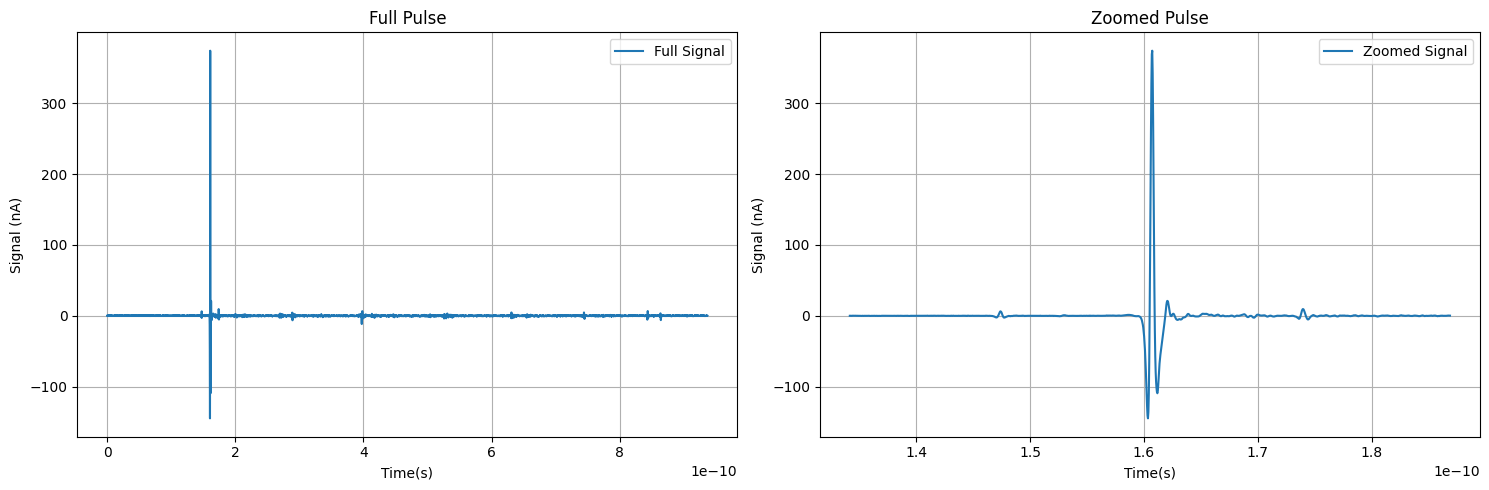

In [22]:
x = data[8]['time']
y = data[8]['signal_sub_bare']

min_index = np.argmin(y)
max_index = np.argmax(y)
middle_index = math.floor((min_index + max_index) / 2)
zoom_start = middle_index - 700
zoom_end = middle_index + 700

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(x, y, label='Full Signal')
plt.xlabel("Time(s)")
plt.ylabel("Signal (nA)")
plt.title("Full Pulse")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(x[zoom_start:zoom_end], y[zoom_start:zoom_end], label='Zoomed Signal')
plt.xlabel("Time(s)")
plt.ylabel("Signal (nA)")
plt.title("Zoomed Pulse")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()